In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.utils.data import sampler
import torchvision.models as models
import math
import torch.nn as nn
import torch.nn.init as init
%matplotlib nbagg

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


Load and process CIFAR 10 data

In [2]:
#from pytorch tutorial
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

Files already downloaded and verified
Files already downloaded and verified


Look at example CIFAR images

  dog  deer plane truck


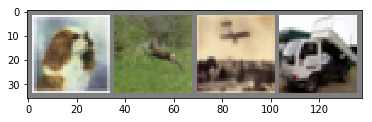

    if timeout < 0 or not self._poll(timeout):
Process Process-1:
Process Process-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python2.7/dist-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
  File "/usr/local/lib/python2.7/dist-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 131, in get
  File "/

In [3]:
#from pytorch tutorial
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Define wrappers for masking out weights

In [4]:
'''
Modified from https://github.com/ChristopherSweeney/pytorch-weights_pruning
'''

class MaskedLinear(nn.Linear):
    def __init__(self, in_features, out_features, bias=True):
        super(MaskedLinear, self).__init__(in_features, out_features, bias)
        self.mask_flag = False
    
    def set_mask(self, mask):
        self.mask = to_var(mask, requires_grad=False)
        self.weight.data = self.weight.data*self.mask.data
        self.mask_flag = True
    
    def get_mask(self):
        print(self.mask_flag)
        return self.mask
    
    def forward(self, x):
        if self.mask_flag == True:
            weight = self.weight*self.mask
            return F.linear(x, weight, self.bias)
        else:
            return F.linear(x, self.weight, self.bias)
        
        
class MaskedConv2d(nn.Conv2d):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1,
                 padding=0, dilation=1, groups=1, bias=True):
        super(MaskedConv2d, self).__init__(in_channels, out_channels, 
            kernel_size, stride, padding, dilation, groups, bias)
        self.mask_flag = False
    
    def set_mask(self, mask):
        self.mask = to_var(mask, requires_grad=False)
        self.weight.data = self.weight.data*self.mask.data
        self.mask_flag = True
    
    def get_mask(self):
        print(self.mask_flag)
        return self.mask
    
    def forward(self, x):
        if self.mask_flag == True:
            weight = self.weight*self.mask
            return F.conv2d(x, weight, self.bias, self.stride,
                        self.padding, self.dilation, self.groups)
        else:
            return F.conv2d(x, self.weight, self.bias, self.stride,
                        self.padding, self.dilation, self.groups)
        

In [71]:
model_ini = DeepConvNet()
st = torch.load("KD/models/distill_best.tar")
model_ini.load_state_dict(st['state_dict'])
model_ini = model_ini.cuda()

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

class ShallowConvNet(nn.Module):
    def __init__(self, hidden=1000):
        super(ShallowConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, hidden)
        self.fc2 = nn.Linear(hidden, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class SimpleConvNet(nn.Module):
    def __init__(self, hidden=1000):
        super(SimpleConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, hidden)
        self.fc2 = nn.Linear(hidden, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class DeepConvNet(nn.Module):
    def __init__(self):
        super(DeepConvNet, self).__init__()
        self.classifer = nn.Sequential(
                MaskedConv2d(3, 192, kernel_size=5, stride=1, padding=2),
                nn.ReLU(inplace=True),
                MaskedConv2d(192, 160, kernel_size=1, stride=1, padding=0),
                nn.ReLU(inplace=True),
                MaskedConv2d(160,  96, kernel_size=1, stride=1, padding=0),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
                nn.Dropout(0.5),

                MaskedConv2d(96, 192, kernel_size=5, stride=1, padding=2),
                nn.ReLU(inplace=True),
                MaskedConv2d(192, 192, kernel_size=1, stride=1, padding=0),
                nn.ReLU(inplace=True),
                MaskedConv2d(192, 192, kernel_size=1, stride=1, padding=0),
                nn.ReLU(inplace=True),
                nn.AvgPool2d(kernel_size=3, stride=2, padding=1),
                nn.Dropout(0.5),

                MaskedConv2d(192, 192, kernel_size=3, stride=1, padding=1),
                nn.ReLU(inplace=True),
                MaskedConv2d(192, 192, kernel_size=1, stride=1, padding=0),
                nn.ReLU(inplace=True),
                MaskedConv2d(192,  10, kernel_size=1, stride=1, padding=0),
                nn.ReLU(inplace=True),
                nn.AvgPool2d(kernel_size=8, stride=1, padding=0),
            )

    def forward(self, x):
        x = self.classifer(x)
        x = x.view(x.size(0), 10)
        return x

class AlexNet(nn.Module):

    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

def num_trainable_parameters(model):
    model_params = filter(lambda p: p.requires_grad, model.parameters())
    num_params = sum([np.prod(p.size()) for p in model_params]) 
    return num_params


In [11]:
'''
Modified from https://github.com/pytorch/vision.git
'''
#make vgg with masked layers
class VGG(nn.Module):
    def __init__(self, features,width=512,classes=10):
        super(VGG, self).__init__()
        self.features = features
        self.classifier = nn.Sequential(
            MaskedLinear(width,width),
            nn.ReLU(True),
            nn.Dropout(),
            MaskedLinear(width, width),
            nn.ReLU(True),
            nn.Dropout(),
            MaskedLinear(width, classes),
        )
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
                m.bias.data.zero_()

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

def make_masked_layers(cfg, batch_norm=False):
    layers = []
    in_channels = 3
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = MaskedConv2d(in_channels, v, kernel_size=3, padding=1)
            layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    return nn.Sequential(*layers)

config = {
    'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 
          512, 512, 512, 512, 'M'],
    'T': [2, 'M', 4, 'M', 8, 8, 'M', 16, 16, 'M', 16, 16, 'M'],
}

def vgg_lite():
    return VGG(make_masked_layers(config['T']),width=16)

def vgg11():
    """VGG 11-layer model (configuration "A")"""
    return VGG(make_masked_layers(config['A']))

def vgg13():
    """VGG 13-layer model (configuration "B")"""
    return VGG(make_masked_layers(config['B']))

def vgg16():
    """VGG 16-layer model (configuration "D")"""
    return VGG(make_masked_layers(config['D']))

def vgg19():
    """VGG 19-layer model (configuration "E")"""
    return VGG(make_masked_layers(config['E']))


In [12]:
"""
adapted from https://github.com/ChristopherSweeney/pytorch-weights_pruning
"""

def to_var(x, requires_grad=False, volatile=False):
    if torch.cuda.is_available():
        x = x.cuda()
    return Variable(x, requires_grad=requires_grad, volatile=volatile)

def prune_rate(model):
    total_nb_param = 0
    nb_zero_param = 0

    layer_id = 0

    for parameter in model.parameters():

        param_this_layer = 1
        for dim in parameter.data.size():
            param_this_layer *= dim
        total_nb_param += param_this_layer

        if len(parameter.data.size()) != 1:
            layer_id += 1
            zero_param_this_layer = np.count_nonzero(parameter.cpu().data.numpy()==0)
            nb_zero_param += zero_param_this_layer

            print("Layer {} | {} layer | {:.2f}% parameters pruned" \
                    .format(
                        layer_id,
                        'Conv' if len(parameter.data.size()) == 4 \
                            else 'Linear',
                        100.*zero_param_this_layer/param_this_layer,
                        ))
    pruning_perc = 100.*nb_zero_param/total_nb_param
    print("Final pruning rate: {:.2f}%".format(pruning_perc))
    return pruning_perc

modify pretrain weights to be compatible with my model

In [14]:
w = torch.load("/home/drc/Downloads/model_best.pth.tar")
w = w['state_dict']
for key in w.keys()[:32]:
    new_key = key.split(".")
    nkey = new_key[0]+'.'+new_key[2]+'.'+new_key[3]
    w[nkey] = w[key]
    del w[key]
w['classifier.0.weight'] =w['classifier.1.weight']
w['classifier.0.bias'] = w['classifier.1.bias']
w['classifier.3.weight'] = w['classifier.4.weight']
w['classifier.3.bias'] = w['classifier.4.bias']
del w['classifier.1.bias']
del w['classifier.4.bias']
del w['classifier.1.weight']
del w['classifier.4.weight']

load model

In [15]:
import torch.utils.model_zoo as model_zoo
vgg_model = vgg19()
#sd = torch.load('/home/drc/Downloads/model_best.pth.tar')
vgg_model.load_state_dict(w)
vgg_model = vgg_model.cuda()
import copy
model = copy.deepcopy(vgg_model)

In [422]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [79]:
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for t, (x, y) in enumerate(trainloader):
        inputs, labels = to_var(x), to_var(y.long())
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if t % 2000 == 0:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, t + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.000
[1,  2001] loss: 0.704


Process Process-60:
    return recv()
Process Process-59:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/local/lib/python2.7/dist-packages/torch/utils/data/dataloader.py", line 36, in _worker_loop
    self._target(*self._args, **self._kwargs)
    r = index_queue.get()
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 378, in get
  File "/usr/local/lib/python2.7/dist-packages/torch/utils/data/dataloader.py", line 36, in _worker_loop
    r = index_queue.get()
  File "/usr/local/lib/python2.7/dist-packages/torch/multiprocessing/queue.py", line 21, in recv
  File "/usr/

KeyboardInterrupt: 

In [13]:
def test(model, loader):

    model.eval()

    num_correct, num_samples = 0, len(loader.dataset)
    for x, y in loader:
        x_var = to_var(x, volatile=True)
        scores = model(x_var)
        _, preds = scores.data.cpu().max(1)
        num_correct += (preds == y).sum()

    acc = float(num_correct) / num_samples

    print('Test accuracy: {:.2f}% ({}/{})'.format(
        100.*acc,
        num_correct,
        num_samples,
        ))
    
    return acc


In [15]:
model_ini = model_ini.cuda()

In [17]:
test(model_ini,testloader)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  


Test accuracy: 71.55% (7155/10000)


0.7155

In [141]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    images, labels = to_var(images), labels.long()

    outputs = vgg_model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


TypeError: eq received an invalid combination of arguments - got (torch.LongTensor), but expected one of:
 * (int value)
      didn't match because some of the arguments have invalid types: ([31;1mtorch.LongTensor[0m)
 * (torch.cuda.LongTensor other)
      didn't match because some of the arguments have invalid types: ([31;1mtorch.LongTensor[0m)


In [404]:
prune_rate(model)

Layer 1 | Conv layer | 0.00% parameters pruned
Layer 2 | Conv layer | 0.00% parameters pruned
Layer 3 | Conv layer | 0.00% parameters pruned
Layer 4 | Conv layer | 0.00% parameters pruned
Layer 5 | Conv layer | 0.00% parameters pruned
Layer 6 | Conv layer | 0.00% parameters pruned
Layer 7 | Conv layer | 0.00% parameters pruned
Layer 8 | Conv layer | 0.00% parameters pruned
Layer 9 | Conv layer | 0.00% parameters pruned
Layer 10 | Conv layer | 0.00% parameters pruned
Layer 11 | Conv layer | 0.00% parameters pruned
Layer 12 | Conv layer | 0.00% parameters pruned
Layer 13 | Conv layer | 0.00% parameters pruned
Layer 14 | Conv layer | 0.00% parameters pruned
Layer 15 | Conv layer | 0.00% parameters pruned
Layer 16 | Conv layer | 0.00% parameters pruned
Layer 17 | Linear layer | 0.00% parameters pruned
Layer 18 | Linear layer | 0.00% parameters pruned
Layer 19 | Linear layer | 0.00% parameters pruned
Final pruning rate: 0.00%


0.0

[[ -95.66773298  175.19038985 -103.59290711]
 [ 121.81439693  753.62593817  124.58494908]
 [-127.11425347  161.19584075 -140.57709652]]


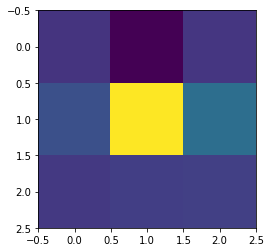

In [405]:
def plot_kernels(tensor, num_cols=6):
    if not tensor.ndim==4:
        raise Exception("assumes a 4D tensor")
    if not tensor.shape[-1]==3:
        raise Exception("last dim needs to be 3 to plot")
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(tensor.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        ax1.imshow(tensor[i])
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()
    
mm = model.cuda().double()
filters = mm.modules
layers=np.zeros((3,3))
body_model = [i for i in mm.children()][0]
for i in body_model:
    if isinstance(i,MaskedConv2d):
        tensor = i.weight.cpu().data.numpy()
        shape = np.shape(tensor)
        layers+=np.sum(np.sum(tensor,axis=0),axis=0)
print layers
plt.figure()
plt.imshow(tensor[0][0])

In [147]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
model = model.float()
for data in testloader:
    images, labels = data
    images, labels = to_var(images),labels
    outputs = vgg_model(images)
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted.cpu().numpy() == labels.numpy()).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane :  2 %
Accuracy of   car :  1 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer : 69 %
Accuracy of   dog : 25 %
Accuracy of  frog :  0 %
Accuracy of horse :  0 %
Accuracy of  ship :  0 %
Accuracy of truck :  0 %


In [18]:
class PruneWrapSparse():
    def __init__(self,train_start,model,sparsity_initial,sparsity_target,prune_steps,update_rate,train):
        #model params
        self.model = model.float()
        self.criterion = torch.nn.CrossEntropyLoss()
        self.train_loader = train
        self.optimizer = optim.SGD(self.model.parameters(), lr=0.0001, momentum=0.9)
        
        #bookkeeping
        self.current_sparsity=0
        self.sparsity_target = sparsity_target
        self.sparsity_initial = sparsity_initial
        self.train_step = train_start
        self.prune_steps =prune_steps
        self.update_rate = update_rate
        self.prunning = True
        self.running_loss = 0
        self.loss_over_time=[]
        self.sparsity_over_time=[]
        self.epoch=[]
        self.train1 = 0.0
        
    def to_string(self):
        print "current sparsity: " + str(self.current_sparsity)
        print "sparsity target: "+ str(self.sparsity_target)
        print "initial sparsity: " + str(self.sparsity_initial)
        print "current train step: "+ str(self.train_step)
        print "prune steps: "+str(self.prune_steps)
        print "prunning rate: "+str(self.update_rate)
        
    def test(self,test_data_loader):
        self.model.eval()
        
        correct, samples = 0, len(test_data_loader.dataset)
        for x, y in test_data_loader:
            x_var = to_var(x, volatile=True)
            scores = self.model(x_var)
            _, preds = scores.data.cpu().max(1)
            correct += (preds == y).sum()

        return float(correct)/samples
    
    def reset(self):
        self.current_sparsity=0.
        self.train_step = 0.
        self.current_sparsity = 0.
    
    def compute_current_target(self):
        return self.sparsity_target+(self.sparsity_initial-self.sparsity_target)*(1-(float(self.train_step)/(self.prune_steps*self.update_rate)))**3
    
    def train(self, optimizer = None, epoches = 10):
        print "training"
        start = time.time()
        for i in range(epoches):
            print self.to_string()
            print "epoch: ", i
            print self.current_sparsity
            for batch, label in self.train_loader:
                #stop prunning?
                if self.prunning and self.current_sparsity >= self.sparsity_target:
                    self.prunning = False
                    print "finished prunning"
                #should i prune?
                if self.train_step%self.update_rate==0:
                    print self.train_step
                    print self.running_loss/float(self.update_rate)
                    if self.prunning:
                        self.prune()
                    self.running_loss = 0.0
                    print prune_rate(self.model)

                #train
                batch,label = (to_var(batch),to_var(label))
                self.optimizer.zero_grad()
                loss = self.criterion(self.model(batch), label)
                loss.backward()
                self.optimizer.step()
                self.running_loss+=loss.data[0]
                self.train_step+=1
                self.train1+=loss.data[0]
                if self.train_step %3000 ==0:
                    self.epoch.append(self.test(testloader))
                    self.train1 = 0
            print prune_rate(self.model)
            print self.test(testloader)
        print "Finished fine tuning."
        print "Time elapsed:" + str((time.time() - start))

    def prune(self):#all conv layers for now
        current_sparsity_target = self.compute_current_target()
        print current_sparsity_target
        print self.to_string()
        for seq in list(self.model.children()):
            for layer in seq:
                if isinstance(layer, MaskedLinear) or isinstance(layer, MaskedConv2d):
                    #find weight threshold for layer
                    weight_threshold = self.get_weight_threshold(layer.parameters(),current_sparsity_target) 
                    #set mask
                    mask = self.get_prune_mask(layer,weight_threshold)
                    #prune
                    layer.set_mask(mask)
        self.sparsity_over_time.append(current_sparsity_target)
        self.current_sparsity = current_sparsity_target # more accurate actually figure out hw much was prunned
        self.loss_over_time.append(self.running_loss/float(self.update_rate))
    
        
    def get_prune_mask(self,layer,threshold):
        # generate mask
        p=layer.weight.data.abs()
        pruned_inds = p > threshold
        return pruned_inds.float()
        
    def save_weight_hist(self,params):
        params = []
        plt.figure()
        for p in self.model.parameters():
            params.extend(list(p.data.cpu().abs().numpy().flatten()))
        plt.hist(params,bins=100,range=[0, 1])
        plt.show()
        
    def get_weight_threshold(self,params,percent_to_prune):
        weights=[]
        for param in params:
            if len(list(param.cpu().data.abs().numpy().flatten()))>1:
                weights.extend(list(param.cpu().data.abs().numpy().flatten()))
        threshold = np.percentile(np.array(weights),percent_to_prune*100)
        #print len(np.nonzero(np.array(weights)))/float(len(weights))
        return threshold

    def calculate_current_model_size(self):
        total_nb_param = 0
        non_zero_param = 0
        for parameter in self.model.parameters():
            total_nb_param += np.size(parameter.cpu().data.abs().numpy())
            non_zero_param += np.count_nonzero(parameter.cpu().data.abs().numpy()>0)
        print "model sparsity: ", 1-float(non_zero_param)/total_nb_param
        bits = 32 #32 bit floats
        return bits*non_zero_param
   
    def calculate_current_model_inference_time(self,samples=10):
        time_sum =0
        for i in range(samples):
            (batch, label) = next(iter(self.train_loader))
            input = to_var(batch.float())
            start = time.time()
            output = self.model(input)
            time_sum+=time.time() - start
        print "Time elapsed:" + str((time_sum/float(samples)))    
            

In [283]:
epoch_start,model,sparsity_initial,sparsity_target,prune_steps,update_rate,train,gpu=False):

SyntaxError: invalid syntax (<ipython-input-283-6e4a567f749a>, line 1)

In [175]:
print prune.calculate_current_model_size()
print prune.calculate_current_model_inference_time(10)

model sparsity:  1.0
657754432
Time elapsed:0.00456907749176
None


In [21]:
print prune1.calculate_current_model_size()
print prune1.calculate_current_model_inference_time(10)

model sparsity:  0.0
30943552


Exception OSError: OSError(104, 'Connection reset by peer') in <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7ff9077d1d90>> ignored


Time elapsed:0.00213510990143
None


In [73]:
print prune1.calculate_current_model_size()
print prune1.calculate_current_model_inference_time(10)

model sparsity:  0.0
30943552
Time elapsed:0.00344841480255
None


In [76]:
torch.save(model_ini.state_dict(), 'KD_prunning_40%.pkl')

In [75]:
test(model_ini,testloader)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  


Test accuracy: 89.29% (8929/10000)


0.8929

In [74]:
prune1.train()

training
current sparsity: 0
sparsity target: 0.4
initial sparsity: 0
current train step: 0
prune steps: 100
prunning rate: 350
None
epoch:  0
0
0
0.0
0.0
current sparsity: 0
sparsity target: 0.4
initial sparsity: 0
current train step: 0
prune steps: 100
prunning rate: 350
None
Layer 1 | Conv layer | 0.01% parameters pruned
Layer 2 | Conv layer | 0.00% parameters pruned
Layer 3 | Conv layer | 0.01% parameters pruned
Layer 4 | Conv layer | 0.00% parameters pruned
Layer 5 | Conv layer | 0.00% parameters pruned
Layer 6 | Conv layer | 0.00% parameters pruned
Layer 7 | Conv layer | 0.00% parameters pruned
Layer 8 | Conv layer | 0.00% parameters pruned
Layer 9 | Conv layer | 0.05% parameters pruned
Final pruning rate: 0.00%
0.000930727021901


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:78: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:80: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


350
tensor(0.5213, device='cuda:0')
0.0118804
current sparsity: 0.0
sparsity target: 0.4
initial sparsity: 0
current train step: 350
prune steps: 100
prunning rate: 350
None
Layer 1 | Conv layer | 1.19% parameters pruned
Layer 2 | Conv layer | 1.19% parameters pruned
Layer 3 | Conv layer | 1.19% parameters pruned
Layer 4 | Conv layer | 1.19% parameters pruned
Layer 5 | Conv layer | 1.19% parameters pruned
Layer 6 | Conv layer | 1.20% parameters pruned
Layer 7 | Conv layer | 1.19% parameters pruned
Layer 8 | Conv layer | 1.19% parameters pruned
Layer 9 | Conv layer | 1.20% parameters pruned
Final pruning rate: 1.19%
1.18729743761
700
tensor(0.3061, device='cuda:0')
0.0235232
current sparsity: 0.0118804
sparsity target: 0.4
initial sparsity: 0
current train step: 700
prune steps: 100
prunning rate: 350
None
Layer 1 | Conv layer | 2.35% parameters pruned
Layer 2 | Conv layer | 2.36% parameters pruned
Layer 3 | Conv layer | 2.34% parameters pruned
Layer 4 | Conv layer | 2.35% parameters pr

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  


3150
tensor(0.1912, device='cuda:0')
0.0985716
current sparsity: 0.0885248
sparsity target: 0.4
initial sparsity: 0
current train step: 3150
prune steps: 100
prunning rate: 350
None
Layer 1 | Conv layer | 9.90% parameters pruned
Layer 2 | Conv layer | 9.88% parameters pruned
Layer 3 | Conv layer | 9.85% parameters pruned
Layer 4 | Conv layer | 9.86% parameters pruned
Layer 5 | Conv layer | 9.87% parameters pruned
Layer 6 | Conv layer | 9.89% parameters pruned
Layer 7 | Conv layer | 9.86% parameters pruned
Layer 8 | Conv layer | 9.89% parameters pruned
Layer 9 | Conv layer | 9.95% parameters pruned
Final pruning rate: 9.85%
9.84874651753
3500
tensor(0.1171, device='cuda:0')
0.1084
current sparsity: 0.0985716
sparsity target: 0.4
initial sparsity: 0
current train step: 3500
prune steps: 100
prunning rate: 350
None
Layer 1 | Conv layer | 10.87% parameters pruned
Layer 2 | Conv layer | 10.87% parameters pruned
Layer 3 | Conv layer | 10.84% parameters pruned
Layer 4 | Conv layer | 10.84% pa

7700
tensor(0.1157, device='cuda:0')
0.2101792
current sparsity: 0.2027844
sparsity target: 0.4
initial sparsity: 0
current train step: 7700
prune steps: 100
prunning rate: 350
None
Layer 1 | Conv layer | 21.04% parameters pruned
Layer 2 | Conv layer | 21.08% parameters pruned
Layer 3 | Conv layer | 21.05% parameters pruned
Layer 4 | Conv layer | 21.02% parameters pruned
Layer 5 | Conv layer | 21.04% parameters pruned
Layer 6 | Conv layer | 21.09% parameters pruned
Layer 7 | Conv layer | 21.02% parameters pruned
Layer 8 | Conv layer | 21.07% parameters pruned
Layer 9 | Conv layer | 21.04% parameters pruned
Final pruning rate: 21.00%
20.9976152705
8050
tensor(0.1096, device='cuda:0')
0.2173868
current sparsity: 0.2101792
sparsity target: 0.4
initial sparsity: 0
current train step: 8050
prune steps: 100
prunning rate: 350
None
Layer 1 | Conv layer | 21.76% parameters pruned
Layer 2 | Conv layer | 21.80% parameters pruned
Layer 3 | Conv layer | 21.77% parameters pruned
Layer 4 | Conv laye

12250
tensor(0.1054, device='cuda:0')
0.29015
current sparsity: 0.2850016
sparsity target: 0.4
initial sparsity: 0
current train step: 12250
prune steps: 100
prunning rate: 350
None
Layer 1 | Conv layer | 29.04% parameters pruned
Layer 2 | Conv layer | 29.10% parameters pruned
Layer 3 | Conv layer | 29.04% parameters pruned
Layer 4 | Conv layer | 29.02% parameters pruned
Layer 5 | Conv layer | 29.03% parameters pruned
Layer 6 | Conv layer | 29.10% parameters pruned
Layer 7 | Conv layer | 29.02% parameters pruned
Layer 8 | Conv layer | 29.08% parameters pruned
Layer 9 | Conv layer | 29.01% parameters pruned
Final pruning rate: 28.99%
28.9856316431
Layer 1 | Conv layer | 27.44% parameters pruned
Layer 2 | Conv layer | 27.49% parameters pruned
Layer 3 | Conv layer | 27.44% parameters pruned
Layer 4 | Conv layer | 27.42% parameters pruned
Layer 5 | Conv layer | 27.44% parameters pruned
Layer 6 | Conv layer | 27.51% parameters pruned
Layer 7 | Conv layer | 27.43% parameters pruned
Layer 8 |

16450
tensor(0.1162, device='cuda:0')
0.3404492
current sparsity: 0.3370144
sparsity target: 0.4
initial sparsity: 0
current train step: 16450
prune steps: 100
prunning rate: 350
None
Layer 1 | Conv layer | 34.09% parameters pruned
Layer 2 | Conv layer | 34.14% parameters pruned
Layer 3 | Conv layer | 34.07% parameters pruned
Layer 4 | Conv layer | 34.05% parameters pruned
Layer 5 | Conv layer | 34.07% parameters pruned
Layer 6 | Conv layer | 34.14% parameters pruned
Layer 7 | Conv layer | 34.06% parameters pruned
Layer 8 | Conv layer | 34.11% parameters pruned
Layer 9 | Conv layer | 34.01% parameters pruned
Final pruning rate: 34.01%
34.0105234202
16800
tensor(1.00000e-02 *
       9.0186, device='cuda:0')
0.3437568
current sparsity: 0.3404492
sparsity target: 0.4
initial sparsity: 0
current train step: 16800
prune steps: 100
prunning rate: 350
None
Layer 1 | Conv layer | 34.42% parameters pruned
Layer 2 | Conv layer | 34.46% parameters pruned
Layer 3 | Conv layer | 34.41% parameters p

21000
tensor(0.1016, device='cuda:0')
0.3744
current sparsity: 0.3724316
sparsity target: 0.4
initial sparsity: 0
current train step: 21000
prune steps: 100
prunning rate: 350
None
Layer 1 | Conv layer | 37.50% parameters pruned
Layer 2 | Conv layer | 37.54% parameters pruned
Layer 3 | Conv layer | 37.45% parameters pruned
Layer 4 | Conv layer | 37.44% parameters pruned
Layer 5 | Conv layer | 37.47% parameters pruned
Layer 6 | Conv layer | 37.54% parameters pruned
Layer 7 | Conv layer | 37.45% parameters pruned
Layer 8 | Conv layer | 37.49% parameters pruned
Layer 9 | Conv layer | 37.45% parameters pruned
Final pruning rate: 37.40%
37.4012653751
21350
tensor(1.00000e-02 *
       9.0137, device='cuda:0')
0.3762724
current sparsity: 0.3744
sparsity target: 0.4
initial sparsity: 0
current train step: 21350
prune steps: 100
prunning rate: 350
None
Layer 1 | Conv layer | 37.67% parameters pruned
Layer 2 | Conv layer | 37.72% parameters pruned
Layer 3 | Conv layer | 37.64% parameters pruned


0.897
current sparsity: 0.3902444
sparsity target: 0.4
initial sparsity: 0
current train step: 25000
prune steps: 100
prunning rate: 350
None
epoch:  2
0.3902444
25200
tensor(1.00000e-02 *
       9.1782, device='cuda:0')
0.3912192
current sparsity: 0.3902444
sparsity target: 0.4
initial sparsity: 0
current train step: 25200
prune steps: 100
prunning rate: 350
None
Layer 1 | Conv layer | 39.17% parameters pruned
Layer 2 | Conv layer | 39.22% parameters pruned
Layer 3 | Conv layer | 39.13% parameters pruned
Layer 4 | Conv layer | 39.12% parameters pruned
Layer 5 | Conv layer | 39.16% parameters pruned
Layer 6 | Conv layer | 39.23% parameters pruned
Layer 7 | Conv layer | 39.13% parameters pruned
Layer 8 | Conv layer | 39.18% parameters pruned
Layer 9 | Conv layer | 39.06% parameters pruned
Final pruning rate: 39.08%
39.0810208214
25550
tensor(1.00000e-02 *
       8.2557, device='cuda:0')
0.3921268
current sparsity: 0.3912192
sparsity target: 0.4
initial sparsity: 0
current train step: 25

29400
tensor(1.00000e-02 *
       8.0910, device='cuda:0')
0.3983616
current sparsity: 0.3980348
sparsity target: 0.4
initial sparsity: 0
current train step: 29400
prune steps: 100
prunning rate: 350
None
Layer 1 | Conv layer | 39.89% parameters pruned
Layer 2 | Conv layer | 39.93% parameters pruned
Layer 3 | Conv layer | 39.85% parameters pruned
Layer 4 | Conv layer | 39.84% parameters pruned
Layer 5 | Conv layer | 39.88% parameters pruned
Layer 6 | Conv layer | 39.95% parameters pruned
Layer 7 | Conv layer | 39.85% parameters pruned
Layer 8 | Conv layer | 39.90% parameters pruned
Layer 9 | Conv layer | 39.79% parameters pruned
Final pruning rate: 39.80%
39.7951986895
29750
tensor(1.00000e-02 *
       6.8855, device='cuda:0')
0.39865
current sparsity: 0.3983616
sparsity target: 0.4
initial sparsity: 0
current train step: 29750
prune steps: 100
prunning rate: 350
None
Layer 1 | Conv layer | 39.92% parameters pruned
Layer 2 | Conv layer | 39.96% parameters pruned
Layer 3 | Conv layer | 

33950
tensor(1.00000e-02 *
       7.4389, device='cuda:0')
0.3999892
current sparsity: 0.3999744
sparsity target: 0.4
initial sparsity: 0
current train step: 33950
prune steps: 100
prunning rate: 350
None
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39.95% parameters pruned
Final pruning rate: 39.96%
39.9582827466
34300
tensor(1.00000e-02 *
       6.9347, device='cuda:0')
0.3999968
current sparsity: 0.3999892
sparsity target: 0.4
initial sparsity: 0
current train step: 34300
prune steps: 100
prunning rate: 350
None
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer 

38850
tensor(1.00000e-02 *
       5.3114, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39.95% parameters pruned
Final pruning rate: 39.96%
39.9582827466
39200
tensor(1.00000e-02 *
       4.8676, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39

44450
tensor(1.00000e-02 *
       6.6285, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39.95% parameters pruned
Final pruning rate: 39.96%
39.9582827466
44800
tensor(1.00000e-02 *
       6.6650, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39

Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39.95% parameters pruned
Final pruning rate: 39.96%
39.9582827466
0.9019
current sparsity: 0.4
sparsity target: 0.4
initial sparsity: 0
current train step: 50000
prune steps: 100
prunning rate: 350
None
epoch:  4
0.4
50050
tensor(1.00000e-02 *
       5.7989, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01%

55300
tensor(1.00000e-02 *
       4.6418, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39.95% parameters pruned
Final pruning rate: 39.96%
39.9582827466
55650
tensor(1.00000e-02 *
       4.8212, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39

60900
tensor(1.00000e-02 *
       5.7739, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39.95% parameters pruned
Final pruning rate: 39.96%
39.9582827466
61250
tensor(1.00000e-02 *
       6.8022, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39

66150
tensor(1.00000e-02 *
       4.0580, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39.95% parameters pruned
Final pruning rate: 39.96%
39.9582827466
66500
tensor(1.00000e-02 *
       3.6507, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39

71750
tensor(1.00000e-02 *
       4.7579, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39.95% parameters pruned
Final pruning rate: 39.96%
39.9582827466
72100
tensor(1.00000e-02 *
       4.2732, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39

77000
tensor(1.00000e-02 *
       3.8321, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39.95% parameters pruned
Final pruning rate: 39.96%
39.9582827466
77350
tensor(1.00000e-02 *
       3.6672, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39

82600
tensor(1.00000e-02 *
       3.9750, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39.95% parameters pruned
Final pruning rate: 39.96%
39.9582827466
82950
tensor(1.00000e-02 *
       4.2751, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39

87850
tensor(1.00000e-02 *
       3.0110, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39.95% parameters pruned
Final pruning rate: 39.96%
39.9582827466
88200
tensor(1.00000e-02 *
       3.2781, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39

93450
tensor(1.00000e-02 *
       3.5766, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39.95% parameters pruned
Final pruning rate: 39.96%
39.9582827466
93800
tensor(1.00000e-02 *
       3.4910, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39

99050
tensor(1.00000e-02 *
       4.8926, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39.95% parameters pruned
Final pruning rate: 39.96%
39.9582827466
99400
tensor(1.00000e-02 *
       4.2745, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39

104300
tensor(1.00000e-02 *
       2.9398, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39.95% parameters pruned
Final pruning rate: 39.96%
39.9582827466
104650
tensor(1.00000e-02 *
       2.8105, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 

109900
tensor(1.00000e-02 *
       3.6063, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39.95% parameters pruned
Final pruning rate: 39.96%
39.9582827466
110250
tensor(1.00000e-02 *
       3.1040, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 

115150
tensor(1.00000e-02 *
       2.4958, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39.95% parameters pruned
Final pruning rate: 39.96%
39.9582827466
115500
tensor(1.00000e-02 *
       2.4281, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 

120750
tensor(1.00000e-02 *
       2.7296, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 39.95% parameters pruned
Final pruning rate: 39.96%
39.9582827466
121100
tensor(1.00000e-02 *
       2.4992, device='cuda:0')
Layer 1 | Conv layer | 40.06% parameters pruned
Layer 2 | Conv layer | 40.09% parameters pruned
Layer 3 | Conv layer | 40.01% parameters pruned
Layer 4 | Conv layer | 40.00% parameters pruned
Layer 5 | Conv layer | 40.04% parameters pruned
Layer 6 | Conv layer | 40.11% parameters pruned
Layer 7 | Conv layer | 40.01% parameters pruned
Layer 8 | Conv layer | 40.06% parameters pruned
Layer 9 | Conv layer | 

In [72]:
prune1 = PruneWrapSparse(0,model_ini,0,.4,100,350,trainloader)

In [48]:
prune = PruneWrapSparse(0,model,0,.99,100,500,trainloader)

NameError: name 'model' is not defined

In [60]:
prune_rate(model_ini)

Layer 1 | Conv layer | 87.83% parameters pruned
Layer 2 | Conv layer | 87.62% parameters pruned
Layer 3 | Conv layer | 87.50% parameters pruned
Layer 4 | Conv layer | 87.50% parameters pruned
Layer 5 | Conv layer | 87.54% parameters pruned
Layer 6 | Conv layer | 87.58% parameters pruned
Layer 7 | Conv layer | 87.51% parameters pruned
Layer 8 | Conv layer | 87.46% parameters pruned
Layer 9 | Conv layer | 87.40% parameters pruned
Final pruning rate: 87.39%


87.38854543912736

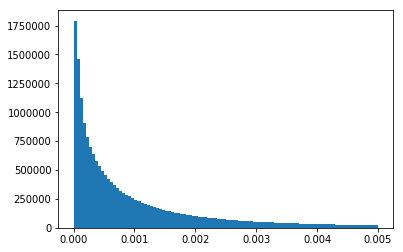

In [358]:
params = []
plt.figure()
for p in model.parameters():
    params.extend(list(p.data.cpu().abs().numpy().flatten()))
plt.hist(params,bins=100,range=[0, .0050])
plt.show()
        

In [160]:
print prune.loss_over_time

[0.0, 0.06519370049238205, 0.027210239917039872, 0.024947272896766664, 0.04021167093515396, 0.02219086182117462, 0.03855616757273674, 0.029483978897333146, 0.02747856941819191, 0.029650130182504654, 0.0289094475209713, 0.027880735576152803, 0.02211495691537857, 0.0267302263379097, 0.01549170196056366, 0.010982877552509308, 0.011556854128837585, 0.009122861206531524, 0.015923032760620116, 0.00663828307390213, 0.011139070212841034, 0.020859219312667848, 0.012059581518173218, 0.032847846925258634, 0.027926816046237944, 0.031210372924804688, 0.013409012377262115, 0.01716043093800545, 0.024219381004571914, 0.018160417020320892, 0.013005426228046417, 0.012911151707172394, 0.017930708199739458, 0.01750793582201004, 0.031143056094646453, 0.04311732774972916, 0.04008971464633942, 0.0270072041451931, 0.018954834401607515, 0.018932074666023254, 0.016342886596918106, 0.025664503395557405, 0.02766636884212494, 0.021070078253746034, 0.0250552698969841, 0.0267739816904068, 0.04334686151146889, 0.0271

In [221]:
import pickle
with open('lossnew.pkl', 'wb') as f:
    pickle.dump(prune.loss_over_time, f)

In [222]:
import pickle
with open('sparsenew.pkl', 'wb') as f:
    pickle.dump(prune.sparsity_over_time, f)

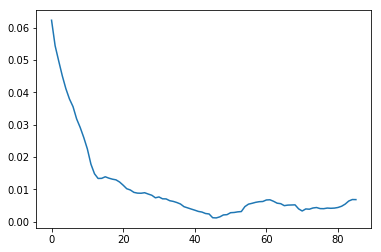

In [248]:
N=15
a =np.convolve(prune.loss_over_time[1:], np.ones((N,))/N, mode='valid')
%matplotlib inline
plt.figure()
plt.plot(range(len(a)),a)

In [314]:
g4 = [.13,.05,.02,.02,.02,.01,.015,.015,.02,.012]
g75 = [.13,.03,.015,.015,.02,.035,.04,.03,.014,.01]
ng75 = [.8,.5,.3,.26,.15,.12,.092,.053,.022,.022]
ng40 = [.8,.4,.33,.26,.15,.12,.092,.053,.022,.022]

Text(0,0.5,u'Loss (Cross Entropy)')

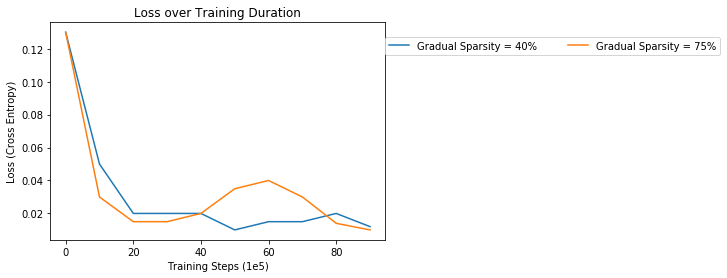

In [316]:
%matplotlib inline
plt.figure()
plt.plot(np.arange(10)*10,g4,label = "Gradual Sparsity = 40%")
plt.plot(np.arange(10)*10,g75,label = "Gradual Sparsity = 75%")
#plt.plot(np.arange(10)*10,ng75,label = "Non-Gradual Sparsity = 75%")
#plt.plot(np.arange(10)*10,ng40,label = "Non-Gradual Sparsity = 75%")

plt.legend(bbox_to_anchor=(1., .85, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.title("Loss over Training Duration")
plt.xlabel("Training Steps (1e5)")
plt.ylabel("Loss (Cross Entropy)")


In [416]:
pl40 = prune.loss_over_time
pa40 = prune.epoch

In [436]:
pa87 = prune.epoch
p87 = prune.loss_over_time

In [512]:
import pickle
with open('gsparsenew40l.pkl', 'wb') as f:
    pickle.dump(pl40, f)
with open('gsparsenew40a.pkl', 'wb') as f:
    pickle.dump(pa40, f)

In [510]:
import pickle
with open('gsparsenew87l.pkl', 'wb') as f:
    pickle.dump(p87, f)
with open('gsparsenew87a.pkl', 'wb') as f:
    pickle.dump(pa87, f)

In [511]:
import pickle
with open('gsparsenew75l.pkl', 'wb') as f:
    pickle.dump(prune.loss_over_time, f)
with open('gsparsenew75l.pkl', 'wb') as f:
    pickle.dump(prune.epoch, f)

In [257]:
import pickle
c=None
with open('hloss1.pkl', 'r') as f:
     c= pickle.load(f)

In [464]:
p75a= prune.epoch
p75l=prune.loss_over_time

In [31]:
ini_save1 = prune1.loss_over_time
ini_save2 = prune1.epoch

In [45]:
ini_save3 = prune1.loss_over_time

In [68]:
ini1 = prune1.loss_over_time

In [77]:
ini4 = prune1.loss_over_time

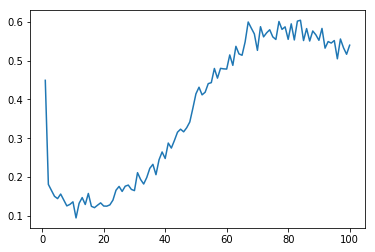

In [67]:
%matplotlib inline
plt.figure()
plt.plot(range(len(prune1.loss_over_time))[1:],prune1.loss_over_time[1:])

Text(0,0.5,u'Cross Entropy Loss')

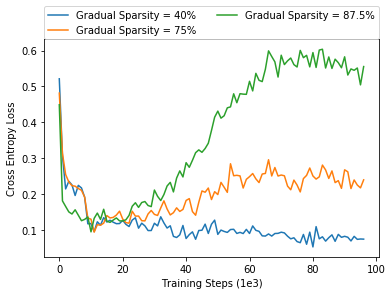

In [78]:
plt.figure()
plt.plot(range(len(ini4[1:98])),ini4[1:98],label = "Gradual Sparsity = 40%")
plt.plot(range(len(ini_save3[1:98])),ini_save3[1:98],label="Gradual Sparsity = 75%")
plt.plot(range(len(ini1[1:98])),ini1[1:98],label = "Gradual Sparsity = 87.5%")
plt.legend(bbox_to_anchor=(0, 1, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel("Training Steps (1e3)")
plt.ylabel("Cross Entropy Loss")

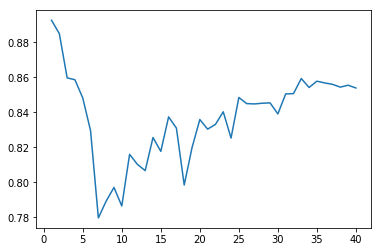

In [64]:
%matplotlib inline
plt.figure()
plt.plot(range(len(prune1.epoch))[1:],prune1.epoch[1:])

In [505]:
p1 = np.arange(len(prune.sparsity_over_time))*1000.
f=.75-.75*(1-(p1/(100*1000)))**3

In [506]:
p2 = np.arange(len(prune.sparsity_over_time))*1000.
f1=.875-.875*(1-(p2/(100*1000)))**3

In [507]:
p3 = np.arange(len(prune.sparsity_over_time))*1000.
f2=.40-.40*(1-(p3/(100*1000)))**3

Text(0,0.5,u'Cross Entropy Loss')

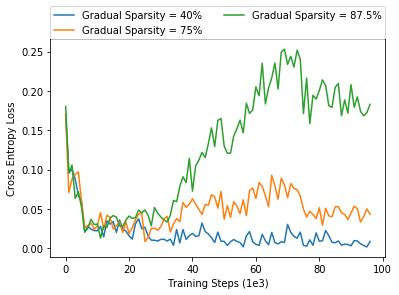

In [484]:
plt.figure()
plt.plot(range(len(pl40[1:98])),pl40[1:98],label = "Gradual Sparsity = 40%")
plt.plot(range(len(p75l[1:98])),p75l[1:98],label="Gradual Sparsity = 75%")
plt.plot(range(len(p87[1:98])),p87[1:98],label = "Gradual Sparsity = 87.5%")
plt.legend(bbox_to_anchor=(0, 1, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel("Training Steps (1e3)")
plt.ylabel("Cross Entropy Loss")

Text(0,0.5,u'top-1-1ccuracy')

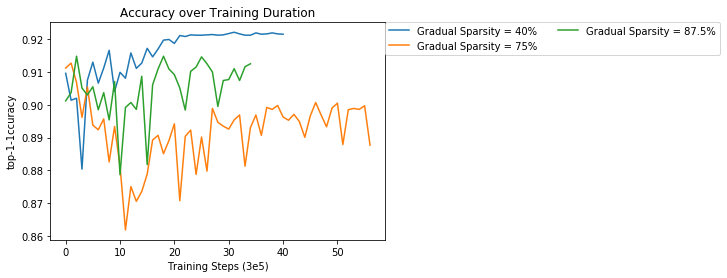

In [474]:
plt.figure()
plt.plot(range(len(pa40)),pa40,label = "Gradual Sparsity = 40%")
plt.plot(range(len(pa87)),pa87,label="Gradual Sparsity = 75%")
plt.plot(range(len(p75a)),p75a,label = "Gradual Sparsity = 87.5%")
plt.legend(bbox_to_anchor=(1., .85, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel("Training Steps (3e5)")
plt.ylabel("top-1-1ccuracy")

Text(0,0.5,u'Sparsity (%)')

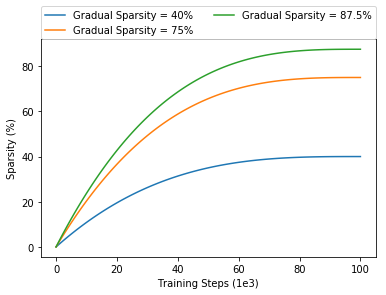

In [509]:
plt.figure()
plt.plot(range(len(prune.sparsity_over_time)),np.array(f2)*100,label="Gradual Sparsity = 40%")
plt.plot(range(len(prune.sparsity_over_time)),np.array(f)*100,label = "Gradual Sparsity = 75%")
plt.plot(range(len(prune.sparsity_over_time)),np.array(f1)*100,label = "Gradual Sparsity = 87.5%")
plt.legend(bbox_to_anchor=(0, 1, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel("Training Steps (1e3)")
plt.ylabel("Sparsity (%)")

In [442]:
prune.test(testloader)

0.9157

In [1]:
torch.save(model.state_dict(), 'vgg19_pruned_75%_best.pkl')

NameError: name 'torch' is not defined

In [ ]:
prune.train()

training
current sparsity: 0
sparsity target: 0.75
initial sparsity: 0
current train step: 0
prune steps: 100
prunning rate: 500
None
epoch:  0
0
0
0.0
0.0
current sparsity: 0
sparsity target: 0.75
initial sparsity: 0
current train step: 0
prune steps: 100
prunning rate: 500
None
Layer 1 | Conv layer | 0.06% parameters pruned
Layer 2 | Conv layer | 0.00% parameters pruned
Layer 3 | Conv layer | 0.00% parameters pruned
Layer 4 | Conv layer | 0.00% parameters pruned
Layer 5 | Conv layer | 0.00% parameters pruned
Layer 6 | Conv layer | 0.00% parameters pruned
Layer 7 | Conv layer | 0.00% parameters pruned
Layer 8 | Conv layer | 0.00% parameters pruned
Layer 9 | Conv layer | 0.00% parameters pruned
Layer 10 | Conv layer | 0.00% parameters pruned
Layer 11 | Conv layer | 0.00% parameters pruned
Layer 12 | Conv layer | 0.00% parameters pruned
Layer 13 | Conv layer | 0.00% parameters pruned
Layer 14 | Conv layer | 0.00% parameters pruned
Layer 15 | Conv layer | 0.00% parameters pruned
Layer 16

4000
0.0495422883034
0.165984
current sparsity: 0.14673225
sparsity target: 0.75
initial sparsity: 0
current train step: 4000
prune steps: 100
prunning rate: 500
None
Layer 1 | Conv layer | 17.07% parameters pruned
Layer 2 | Conv layer | 16.62% parameters pruned
Layer 3 | Conv layer | 16.61% parameters pruned
Layer 4 | Conv layer | 16.61% parameters pruned
Layer 5 | Conv layer | 16.60% parameters pruned
Layer 6 | Conv layer | 16.60% parameters pruned
Layer 7 | Conv layer | 16.60% parameters pruned
Layer 8 | Conv layer | 16.60% parameters pruned
Layer 9 | Conv layer | 16.61% parameters pruned
Layer 10 | Conv layer | 16.60% parameters pruned
Layer 11 | Conv layer | 16.60% parameters pruned
Layer 12 | Conv layer | 16.60% parameters pruned
Layer 13 | Conv layer | 16.60% parameters pruned
Layer 14 | Conv layer | 16.60% parameters pruned
Layer 15 | Conv layer | 16.60% parameters pruned
Layer 16 | Conv layer | 16.60% parameters pruned
Layer 17 | Linear layer | 16.62% parameters pruned
Layer 1

8000
0.024519808054
0.305472
current sparsity: 0.28940625
sparsity target: 0.75
initial sparsity: 0
current train step: 8000
prune steps: 100
prunning rate: 500
None
Layer 1 | Conv layer | 31.13% parameters pruned
Layer 2 | Conv layer | 30.58% parameters pruned
Layer 3 | Conv layer | 30.57% parameters pruned
Layer 4 | Conv layer | 30.56% parameters pruned
Layer 5 | Conv layer | 30.55% parameters pruned
Layer 6 | Conv layer | 30.56% parameters pruned
Layer 7 | Conv layer | 30.56% parameters pruned
Layer 8 | Conv layer | 30.56% parameters pruned
Layer 9 | Conv layer | 30.56% parameters pruned
Layer 10 | Conv layer | 30.55% parameters pruned
Layer 11 | Conv layer | 30.55% parameters pruned
Layer 12 | Conv layer | 30.55% parameters pruned
Layer 13 | Conv layer | 30.55% parameters pruned
Layer 14 | Conv layer | 30.55% parameters pruned
Layer 15 | Conv layer | 30.55% parameters pruned
Layer 16 | Conv layer | 30.55% parameters pruned
Layer 17 | Linear layer | 30.59% parameters pruned
Layer 18

In [140]:
import torch.utils.model_zoo as model_zoo
vgg_model1 = vgg19()
#sd = torch.load('/home/drc/Downloads/model_best.pth.tar')
vgg_model1.load_state_dict(w)
vgg_model1 = vgg_model1.cuda()
import copy
model1 = copy.deepcopy(vgg_model1)

In [141]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9)

In [142]:
def prune(model,target):#all conv layers for now
        for seq in list(model.children()):
            for layer in seq:
                if isinstance(layer, MaskedLinear) or isinstance(layer, MaskedConv2d):
                    #find weight threshold for layer
                    weight_threshold = get_weight_threshold(layer.parameters(),target) 
                    #set mask
                    mask = get_prune_mask(layer,weight_threshold)
                    #prune
                    layer.set_mask(mask)
        
def get_prune_mask(layer,threshold):
        # generate mask
        p=layer.weight.data.abs()
        pruned_inds = p > threshold
        return pruned_inds.float()

        
def get_weight_threshold(params,percent_to_prune):
        weights=[]
        for param in params:
            if len(list(param.cpu().data.abs().numpy().flatten()))>1:
                weights.extend(list(param.cpu().data.abs().numpy().flatten()))
        threshold = np.percentile(np.array(weights),percent_to_prune*100)
        #print len(np.nonzero(np.array(weights)))/float(len(weights))
        return threshold
    
test(model1,testloader)

# prune the weights
prune(model1,.75)
test(model1, testloader)

Test accuracy: 80.70% (8070/10000)
Test accuracy: 64.71% (6471/10000)


0.6471

In [500]:
prune_rate(model1)

Layer 1 | Conv layer | 76.50% parameters pruned
Layer 2 | Conv layer | 75.08% parameters pruned
Layer 3 | Conv layer | 75.06% parameters pruned
Layer 4 | Conv layer | 75.03% parameters pruned
Layer 5 | Conv layer | 75.01% parameters pruned
Layer 6 | Conv layer | 75.01% parameters pruned
Layer 7 | Conv layer | 75.02% parameters pruned
Layer 8 | Conv layer | 75.02% parameters pruned
Layer 9 | Conv layer | 75.03% parameters pruned
Layer 10 | Conv layer | 75.02% parameters pruned
Layer 11 | Conv layer | 75.02% parameters pruned
Layer 12 | Conv layer | 75.01% parameters pruned
Layer 13 | Conv layer | 75.01% parameters pruned
Layer 14 | Conv layer | 75.01% parameters pruned
Layer 15 | Conv layer | 75.01% parameters pruned
Layer 16 | Conv layer | 75.01% parameters pruned
Layer 17 | Linear layer | 75.08% parameters pruned
Layer 18 | Linear layer | 75.06% parameters pruned
Layer 19 | Linear layer | 75.06% parameters pruned
Final pruning rate: 74.99%


74.99338111643465

In [144]:
losses=[]


for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for t, (x, y) in enumerate(trainloader):
        inputs, labels = to_var(x), to_var(y.long())
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if t % 1000 == 0:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, t + 1, running_loss / 1000.))
            losses.append(running_loss/1000.)
            running_loss = 0.0

print('Finished Training')


#torch.save(net.state_dict(), 'vgg_pruned.pkl')

[1,     1] loss: 0.000
[1,  1001] loss: 0.842
[1,  2001] loss: 0.568
[1,  3001] loss: 0.510
[1,  4001] loss: 0.446
[1,  5001] loss: 0.424
[1,  6001] loss: 0.371
[1,  7001] loss: 0.381
[1,  8001] loss: 0.340
[1,  9001] loss: 0.344
[1, 10001] loss: 0.330
[1, 11001] loss: 0.321
[1, 12001] loss: 0.303
[2,     1] loss: 0.000
[2,  1001] loss: 0.202
[2,  2001] loss: 0.246
[2,  3001] loss: 0.245
[2,  4001] loss: 0.214
[2,  5001] loss: 0.225
[2,  6001] loss: 0.224
[2,  7001] loss: 0.208
[2,  8001] loss: 0.207
[2,  9001] loss: 0.186
[2, 10001] loss: 0.194
[2, 11001] loss: 0.224
[2, 12001] loss: 0.225
[3,     1] loss: 0.000
[3,  1001] loss: 0.139
[3,  2001] loss: 0.130
[3,  3001] loss: 0.137
[3,  4001] loss: 0.150
[3,  5001] loss: 0.141
[3,  6001] loss: 0.196
[3,  7001] loss: 0.141
[3,  8001] loss: 0.169
[3,  9001] loss: 0.166
[3, 10001] loss: 0.152
[3, 11001] loss: 0.145
[3, 12001] loss: 0.156
[4,     1] loss: 0.000
[4,  1001] loss: 0.100
[4,  2001] loss: 0.095
[4,  3001] loss: 0.112
[4,  4001] 

In [145]:
test(model1, testloader)

Test accuracy: 89.40% (8940/10000)


0.894

In [147]:
prune_rate(model1)

Layer 1 | Conv layer | 76.50% parameters pruned
Layer 2 | Conv layer | 75.08% parameters pruned
Layer 3 | Conv layer | 75.06% parameters pruned
Layer 4 | Conv layer | 75.03% parameters pruned
Layer 5 | Conv layer | 75.01% parameters pruned
Layer 6 | Conv layer | 75.01% parameters pruned
Layer 7 | Conv layer | 75.02% parameters pruned
Layer 8 | Conv layer | 75.02% parameters pruned
Layer 9 | Conv layer | 75.03% parameters pruned
Layer 10 | Conv layer | 75.02% parameters pruned
Layer 11 | Conv layer | 75.02% parameters pruned
Layer 12 | Conv layer | 75.01% parameters pruned
Layer 13 | Conv layer | 75.01% parameters pruned
Layer 14 | Conv layer | 75.01% parameters pruned
Layer 15 | Conv layer | 75.01% parameters pruned
Layer 16 | Conv layer | 75.01% parameters pruned
Layer 17 | Linear layer | 75.08% parameters pruned
Layer 18 | Linear layer | 75.06% parameters pruned
Layer 19 | Linear layer | 75.06% parameters pruned
Final pruning rate: 74.99%


74.99338111643465

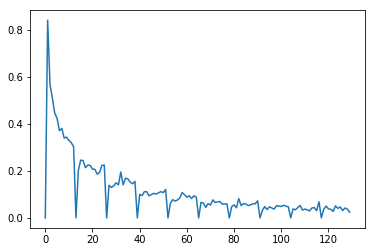

In [146]:
plt.figure()
plt.plot(losses)

### adapted from https://github.com/pytorch/vision/blob/master/torchvision/models/vgg.py

notes:

questions?:
    1. Data involved or data agnostic
    2. during training or after
    3. Inference citeria, or backprop criteria.
    4. at what point during training do you prune
    5. using gradient and activation signals if one is high
    6. train from scratch work or need long burn in time
    7. VGG is notoriously slow to train with large memory footprint, what about squeeznet, arcitectures that are just better
    8. layerwise or globally
    9. when using speed as metric have to make sure your prunning method is super efficient
 Channel-wise
 10. if not layerwise how do params get masked over time, in what layersc
SSL [49] reaches high compression ratio for first few conv
layers of LeNet [30] and AlexNet [26]. [54] could work
well for fully connected layers. However, training-based
approaches are more costly, and the effectiveness for very
deep networks on large datasets is rarely exploited

